### 어쩌다 데이터 분석
- 284 ~ 356: bike
- 내용 복습, 데이터셋에 적용
- 분석 목적 설정 후 인사이트 공유

In [1]:
import pandas as pd

bike = pd.read_csv("bike_data.csv")
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
import datetime
# 변수 타입 변환
bike.datetime = pd.to_datetime(bike['datetime'])

In [3]:
bike.datetime.dtype #변환된 데이터 타입 확인

dtype('<M8[ns]')

In [4]:
print(bike.datetime.min())
print(bike.datetime.max())

2011-01-01 00:00:00
2012-12-19 23:00:00


In [5]:
# 변수 추가: 연도, 월, 일, 시간, 요일
bike['year'] = bike.datetime.dt.year
bike['month'] = bike.datetime.dt.month
bike['day'] = bike.datetime.dt.day
bike['time'] = bike.datetime.dt.hour
bike['weekday'] = bike.datetime.dt.weekday # 월요일: 0

# 변수 추가 결과 확인
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,time,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [6]:
bike['month'].value_counts() #각 월의 데이터 건수가 비교적 균일

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [7]:
# 한국의 사계절과 비슷한 기온 평균
# 다만 전반적으로 온난한 기후
bike.groupby('month').agg(temp_mean = ('temp', 'mean'),
                         temp_min = ('temp', 'min'),
                         temp_max = ('temp', 'max'))

,temp_mean,temp_min,temp_max
month,,,
1,9.840000,0.82,23.78
2,11.798535,2.46,27.06
3,15.902175,4.92,29.52
4,18.718372,9.84,32.80
5,22.674079,13.94,31.16
6,27.064496,18.86,38.54
7,30.841711,23.78,41.00
8,29.736689,24.60,37.72
9,25.779032,15.58,35.26


In [8]:
# season : 흔히 아는 봄-여름-가을-겨울이 아닌 것 확인
bike.groupby('season')['month'].unique()

season
1       [1, 2, 3]
2       [4, 5, 6]
3       [7, 8, 9]
4    [10, 11, 12]
Name: month, dtype: object

In [9]:
### 가설: 월에 따라 count, registered 평균에 차이가 있을 것이다

bike.groupby('month').agg(count = ('count', 'mean'),
                         registered = ('registered', 'mean'))

,count,registered
month,,
1,90.366516,82.162896
2,110.003330,99.684795
3,148.169811,120.360710
4,184.160616,140.361936
5,219.459430,174.190789
6,242.031798,188.770833
7,235.325658,179.462719
8,234.118421,183.822368
9,233.805281,183.309131


가설 검정 결과: 겨울에는 대여량이 현저하게 줄어들고, 날이 풀리는 3월부터 점차 대여량이 많아진다. 여름에는 대여량이 감소하지 않는 것으로 보인다.

count와 registered는 비슷하게 증가/감소하는 것을 알 수 있다. 다만 무더위가 심해지는 7월에는 registered 평균이 일시적으로 감소한다.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

### 가설: 시간대별로 count에 차이가 있을 것이다
time = bike.groupby('time').agg(count_mean = ('count', 'mean'),
                                registered_mean = ('registered', 'mean')).reset_index()
time

,time,count_mean,registered_mean
0,0,55.138462,44.826374
1,1,33.859031,27.345815
2,2,22.899554,18.080357
3,3,11.757506,9.076212
4,4,6.407240,5.144796
5,5,19.767699,18.311947
6,6,76.259341,72.109890
7,7,213.116484,202.202198
8,8,362.769231,341.226374
9,9,221.780220,190.824176


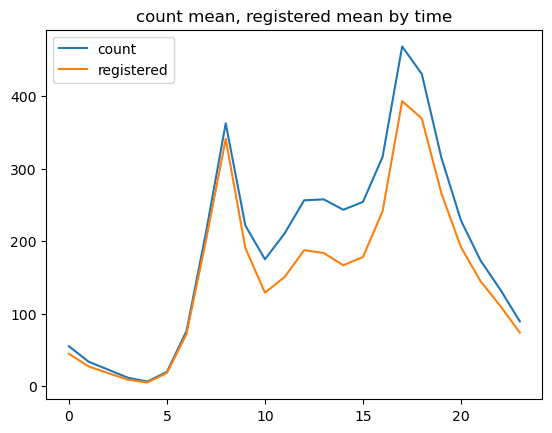

In [11]:
plt.plot(time.time, time.count_mean, label = 'count')
plt.plot(time.time, time.registered_mean, label = 'registered')
plt.legend(loc = 'best')
plt.title('count mean, registered mean by time')
plt.show() #시간대별 count, registered 시각화

<BarContainer object of 24 artists>

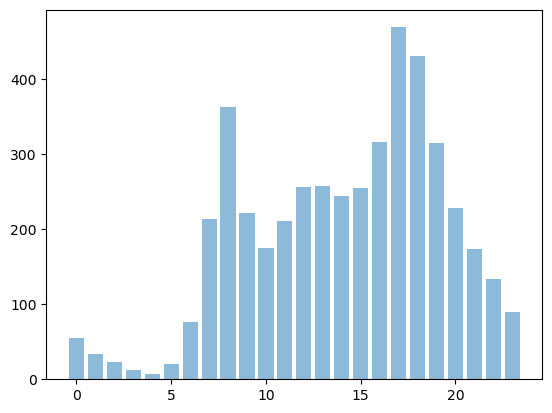

In [12]:
# 계절별 색상을 다르게 해 월별 count 평균 시각화
plt.bar(time.time, time.count_mean, alpha = 0.5)

가설 검정 결과, 시간대에 따라서는 유의미한 차이가 있는 것으로 나타났다. 이른 오전과 3시 이후의 오후 시간에 count 평균이 가장 많은 것으로 보이며, 새벽 시간대에는 다른 시간대보다 count 평균이 현저하게 낮은 것을 알 수 있다.

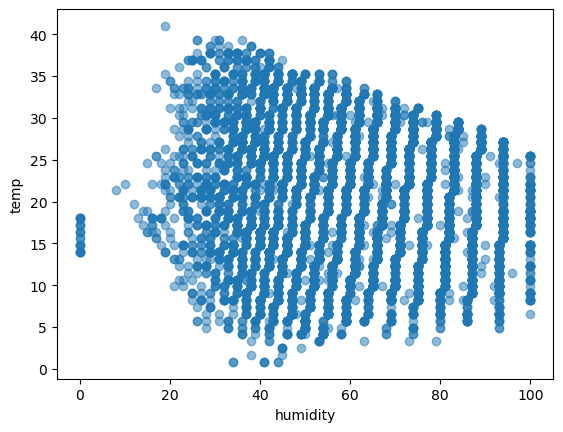

In [13]:
### 습도와 온도 간 패턴이 있는지 확인
plt.scatter(bike.humidity, bike.temp, alpha = 0.5)
plt.xlabel('humidity')
plt.ylabel('temp')
plt.show()

AttributeError: 'dict' object has no attribute 'set_xticklabels'

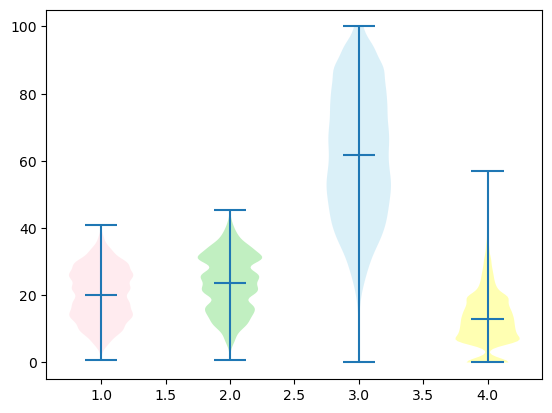

In [21]:
### 기후 관련 변수의 violinplot 확인
violin = plt.violinplot([bike.temp, bike.atemp, bike.humidity, bike.windspeed],
                        showmeans = True)
violin['bodies'][0].set_facecolor('pink')
violin['bodies'][1].set_facecolor('limegreen')
violin['bodies'][2].set_facecolor('skyblue')
violin['bodies'][3].set_facecolor('yellow')
violin.set_xticklabels(['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()

### 혼자 공부하는 데이터 분석
- 302 ~ 325, 349 ~ 378: mpg
- 고급 기능 내용 정리
- 분석 목적 or 가설 세우고 시각화
- 비교분석
-------------------------------------------------------
<고급 기능>
- value counts: 고유값 등장 횟수 계산
- sort index: 인덱스 순으로 정렬
- apply: 데이터프레임에 사용자 정의함수를 반복 적용하는 경우
<br> <br> 
- plot
- linestyle: 선 종류
- xticks: x축 눈금
- annotate(그래프에 나타낼 문자열, 문자열이 나타날 좌표(x,y))
- xytext: 텍스트 위치 조정. annotate 함수의 인자
- textcoords: 텍스트 위치 조정. annotate 함수의 인자. <br> 상대적인 위치를 나타내기 위해선 textcoords = 'offset points
<br> <br> 
- 이미지 불러오기: plt.imread('파일명')
- 이미지 나타내기: plt.imshow()
- 이미지 저장하기: plt.imsave('파일명', 변수)
- 그래프 저장하기: plt.savefig('파일명')
> plt.show() 이전에 나타나야 한다. <br>
> dpi를 높게 설정하면 고해상도 이미지
<br> <br> 
- 선 그래프를 여러 개 그릴 경우: fig, ax = plt.subplots() 사용
- 축 범위 설정 시: ax.set_xlim()
> plt에서는 plt.xlim()
- 스택 영역 그래프 그리기: stackplot
- plt에서 막대그래프 쌓기: bottom 매개 변수
- pandas에서 스택 영역 그래프 그리기: plot.area

In [15]:
mpg = pd.read_csv("mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [16]:
mpg['eff'] = (mpg['cty'] + mpg['hwy']) / 2 # 연비 변수 추가
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,eff
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


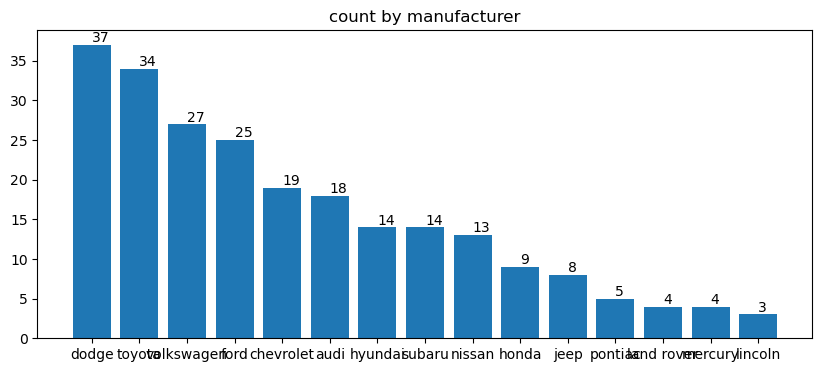

In [17]:
# 제조사별 고유횟수 시각화
manu = mpg.manufacturer.value_counts()
plt.figure(figsize = (10,4))
plt.bar(manu.index, manu.values)
plt.title("count by manufacturer")
for idx, val in manu.items():
    plt.annotate(val, (idx, val), xytext = (0,2), textcoords = 'offset points')
plt.show()

In [18]:
manu = mpg.groupby('manufacturer').agg(eff = ('eff', 'mean')).reset_index()
manu

,manufacturer,eff
0,audi,22.027778
1,chevrolet,18.447368
2,dodge,15.540541
3,ford,16.680000
4,honda,28.500000
5,hyundai,22.750000
6,jeep,15.562500
7,land rover,14.000000
8,lincoln,14.166667
9,mercury,15.625000


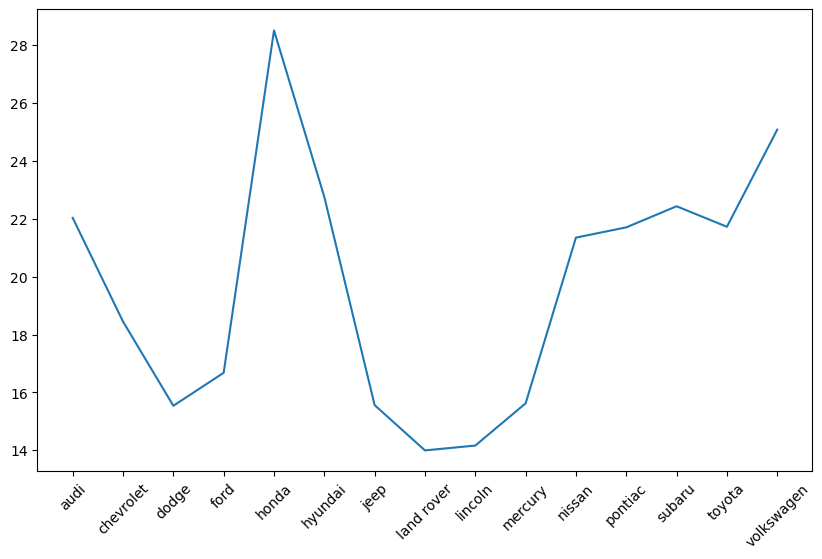

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
### 가설: 제조사별 평균 연비에 차이가 있다.
ax.plot(manu['manufacturer'], manu['eff'])
plt.xticks(rotation = 45)
plt.show()

가설 확인 결과, 혼다와 폭스바겐의 평균 연비가 높았으며 랜드로버, 링컨의 평균 연비가 낮은 것을 확인할 수 있었다.

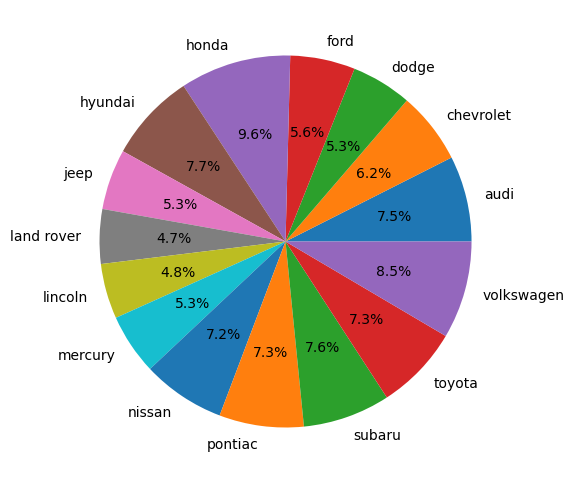

In [20]:
fig,ax = plt.subplots(figsize = (6,8))
ax.pie(manu['eff'], labels = manu['manufacturer'],
      autopct = '%.1f%%')
plt.show()